In [1]:
1. #Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only.
#Add a trendline to show the correlation and color-code the points based on app categories

1.0

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
apps_df=pd.read_csv(r"C:\Users\dell\Downloads\googleplaystore.csv")

In [4]:
paid_apps = apps_df[apps_df['Type'] == 'Paid']

In [5]:
# Drop missing values in key columns
paid_apps = paid_apps.dropna(subset=['Price', 'Installs', 'Category'])

In [6]:
# Clean and convert data types
paid_apps['Installs'] = paid_apps['Installs'].replace('[+,]', '', regex=True).astype(int)
paid_apps['Price'] = paid_apps['Price'].replace('[$]', '', regex=True).astype(float)

In [7]:
# Calculate Revenue (Installs × Price)
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']

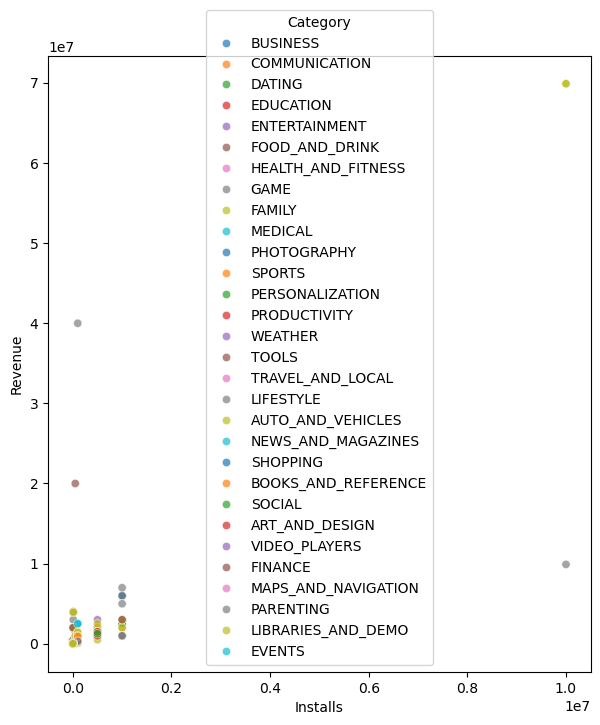

In [8]:
# Create scatter plot
plt.figure(figsize=(7, 8))
scatter_plot = sns.scatterplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette='tab10',
    alpha=0.7
)


In [9]:
# Add trendline
sns.regplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    scatter=False,
    ax=scatter_plot,
    color='black',
    line_kws={"linewidth": 2}
)


<Axes: xlabel='Installs', ylabel='Revenue'>

C:\Users\dell\AppData\Local\Temp\ipykernel_15372\2739754168.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


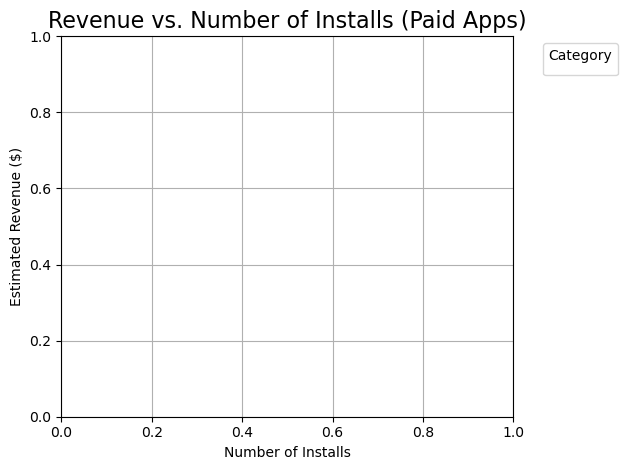

In [10]:
# Final touches
plt.title('Revenue vs. Number of Installs (Paid Apps)', fontsize=16)
plt.xlabel('Number of Installs')
plt.ylabel('Estimated Revenue ($)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

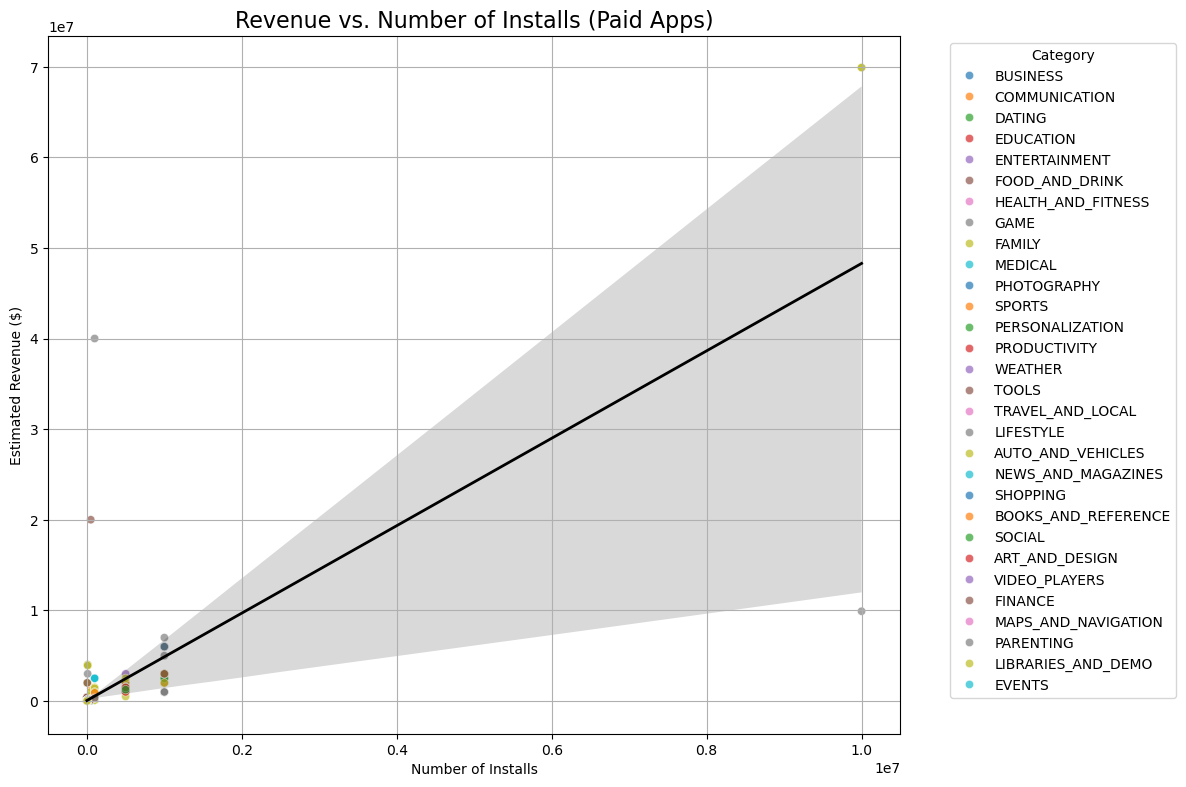

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
apps_df = pd.read_csv(r"C:\Users\dell\Downloads\googleplaystore.csv")

# Filter for paid apps only
paid_apps = apps_df[apps_df['Type'] == 'Paid']

# Drop missing values in key columns
paid_apps = paid_apps.dropna(subset=['Price', 'Installs', 'Category'])

# Clean and convert data types
paid_apps['Installs'] = paid_apps['Installs'].replace('[+,]', '', regex=True).astype(int)
paid_apps['Price'] = paid_apps['Price'].replace('[$]', '', regex=True).astype(float)

# Calculate Revenue (Installs × Price)
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette='tab10',
    alpha=0.7
)

# Add trendline
sns.regplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    scatter=False,
    ax=scatter_plot,
    color='black',
    line_kws={"linewidth": 2}
)

# Final touches
plt.title('Revenue vs. Number of Installs (Paid Apps)', fontsize=16)
plt.xlabel('Number of Installs')
plt.ylabel('Estimated Revenue ($)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

# Load dataset
apps_df = pd.read_csv(r"C:\Users\dell\Downloads\googleplaystore.csv")

# Drop rows with missing key values
apps_df = apps_df.dropna(subset=['Rating', 'Installs', 'Size', 'Reviews', 'Last Updated', 'Category'])

# Clean Installs: Remove + and , and convert to int safely
apps_df = apps_df[apps_df['Installs'].str.contains('^[0-9,]+[+]$', regex=True)]
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Clean Reviews: Convert to int (filter non-numeric)
apps_df = apps_df[apps_df['Reviews'].str.isnumeric()]
apps_df['Reviews'] = apps_df['Reviews'].astype(int)

# Clean Size: Convert values like 'Varies with device' or 'Free' to NaN
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size or 'K' in size:
        return float(size.replace('k', '').replace('K', '')) / 1024
    else:
        return None  # Varies with device, Free, etc.

apps_df['Size_MB'] = apps_df['Size'].apply(convert_size)
apps_df = apps_df.dropna(subset=['Size_MB'])

# Convert Last Updated to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')
apps_df = apps_df.dropna(subset=['Last Updated'])
apps_df = apps_df[apps_df['Last Updated'].dt.month == 1]  # Only Jan updates

# Filter on rating and size
filtered_df = apps_df[(apps_df['Rating'] >= 4.0) & (apps_df['Size_MB'] >= 10)]

# Get top 10 categories by total installs
top_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(10).index
top_df = filtered_df[filtered_df['Category'].isin(top_categories)]

# Group by category
summary_df = top_df.groupby('Category').agg({
    'Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

# Melt for grouped bar chart
summary_melted = pd.melt(summary_df, id_vars='Category', 
                         value_vars=['Rating', 'Reviews'], 
                         var_name='Metric', value_name='Value')

# Time check for 3PM–5PM IST
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)

if 15 <= now.hour < 17:
    plt.figure(figsize=(14, 8))
    sns.barplot(data=summary_melted, x='Category', y='Value', hue='Metric', palette='Set2')
    plt.title('Top 10 App Categories: Avg Rating & Total Reviews (Jan, Size ≥10MB, Rating ≥4.0)')
    plt.xticks(rotation=45)
    plt.ylabel("Value")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
else:
    print("⏳ This graph is only visible between 3 PM and 5 PM IST.")


⏳ This graph is only visible between 3 PM and 5 PM IST.


In [13]:
import pandas as pd
import plotly.express as px
from datetime import datetime
import pytz

# Load dataset
apps_df = pd.read_csv(r"C:\Users\dell\Downloads\googleplaystore.csv")

# Drop missing values
apps_df = apps_df.dropna(subset=['Category', 'Installs'])

# Clean Installs column
apps_df = apps_df[apps_df['Installs'].str.contains('^[0-9,]+[+]$', regex=True)]
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Remove categories starting with A, C, G, S
apps_df = apps_df[~apps_df['Category'].str.startswith(('A', 'C', 'G', 'S'))]

# Group by Category to sum installs
category_installs = apps_df.groupby('Category')['Installs'].sum().reset_index()

# Get top 5 categories by installs
top5_categories = category_installs.sort_values(by='Installs', ascending=False).head(5)

# Simulate Country assignment for example (replace this with actual 'Country' if available)
# Here we randomly assign country codes just to demonstrate
import numpy as np
country_list = ['US', 'IN', 'BR', 'RU', 'FR']
top5_categories['Country'] = np.random.choice(country_list, size=len(top5_categories))

# Add flag for highlight if installs > 1 million
top5_categories['Highlight'] = top5_categories['Installs'] > 1_000_000

# TIME CHECK: only display between 6 PM and 8 PM IST
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)

if 18 <= now.hour < 20:
    fig = px.choropleth(
        top5_categories,
        locations='Country',
        color='Installs',
        hover_name='Category',
        color_continuous_scale='YlGnBu',
        title='Global Installs by Top 5 App Categories',
    )

    # Add marker/highlight using hover info
    fig.update_traces(marker_line_width=1.5)
    fig.show()
else:
    print("🌐 Choropleth map is only visible between 6 PM and 8 PM IST.")


🌐 Choropleth map is only visible between 6 PM and 8 PM IST.


In [14]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import pytz

# Load data
df = pd.read_csv(r"C:\Users\dell\Downloads\googleplaystore.csv")

# Drop missing key columns
df = df.dropna(subset=['App', 'Type', 'Installs', 'Price', 'Android Ver', 'Size', 'Category', 'Content Rating'])

# Clean Installs
df = df[df['Installs'].str.contains('^[0-9,]+[+]$', regex=True)]
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Clean Price column for revenue estimation
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)

# Calculate Revenue = Price × Installs (for paid apps only)
df['Revenue'] = df['Price'] * df['Installs']

# Convert Android Version
def parse_android_version(ver):
    try:
        return float(ver.split()[0])
    except:
        return None

df['Android_Ver'] = df['Android Ver'].apply(parse_android_version)
df = df.dropna(subset=['Android_Ver'])

# Clean Size (MB)
def convert_size(size):
    try:
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size or 'K' in size:
            return float(size.replace('k', '').replace('K', '')) / 1024
    except:
        return None

df['Size_MB'] = df['Size'].apply(convert_size)
df = df.dropna(subset=['Size_MB'])

# Apply all filters
filtered_df = df[
    (df['Installs'] >= 10000) &
    (df['Revenue'] >= 10000) &
    (df['Android_Ver'] > 4.0) &
    (df['Size_MB'] > 15) &
    (df['Content Rating'] == 'Everyone') &
    (df['App'].str.len() <= 30)
]

# Top 3 app categories by total installs
top_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(3).index
top_df = filtered_df[filtered_df['Category'].isin(top_categories)]

# Group by Type (Free/Paid) within top categories
grouped = top_df.groupby(['Category', 'Type']).agg({
    'Installs': 'mean',
    'Revenue': 'mean'
}).reset_index()

# TIME CHECK: Only show chart from 1 PM to 2 PM IST
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)

if 13 <= now.hour < 14:
    # Create dual-axis plot using Plotly
    fig = go.Figure()

    # Bar for Average Installs
    fig.add_trace(go.Bar(
        x=grouped['Category'] + " - " + grouped['Type'],
        y=grouped['Installs'],
        name='Avg Installs',
        yaxis='y1',
        marker_color='lightblue'
    ))

    # Line for Average Revenue
    fig.add_trace(go.Scatter(
        x=grouped['Category'] + " - " + grouped['Type'],
        y=grouped['Revenue'],
        name='Avg Revenue',
        yaxis='y2',
        mode='lines+markers',
        line=dict(color='darkgreen', width=3)
    ))

    # Layout with dual axes
    fig.update_layout(
        title="Avg Installs vs Revenue by Type in Top 3 Categories (Filtered)",
        xaxis=dict(title="Category - Type"),
        yaxis=dict(title="Avg Installs", side='left'),
        yaxis2=dict(title="Avg Revenue ($)", overlaying='y', side='right'),
        legend=dict(x=0.01, y=0.99),
        width=1000,
        height=600
    )

    fig.show()
else:
    print("📊 Dual-axis chart is only visible between 1 PM and 2 PM IST.")


📊 Dual-axis chart is only visible between 1 PM and 2 PM IST.


In [15]:
import pandas as pd
import plotly.express as px
from datetime import datetime
import pytz

# Load the dataset
df = pd.read_csv(r"C:\Users\dell\Downloads\googleplaystore.csv")

# Optional: Load sentiment data if available (assuming a column named 'Sentiment_Subjectivity')
# If it's part of the same CSV, continue. If from a second CSV, you'd merge on app name or ID.

# Drop rows with missing necessary values
df = df.dropna(subset=['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Size'])

# Clean and convert installs
df = df[df['Installs'].str.contains('^[0-9,]+[+]$', regex=True)]
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean Size column to MB
def convert_size(size):
    try:
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size or 'K' in size:
            return float(size.replace('k', '').replace('K', '')) / 1024
    except:
        return None

df['Size_MB'] = df['Size'].apply(convert_size)
df = df.dropna(subset=['Size_MB'])

# Simulate Sentiment Subjectivity (if not available)
# If you already have it, skip this and use your actual values
import numpy as np
np.random.seed(0)
df['Sentiment_Subjectivity'] = np.random.uniform(0.3, 1.0, len(df))  # Simulated; replace with real if available

# Apply all filters
allowed_categories = ['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION', 
                      'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']

filtered_df = df[
    (df['Rating'] > 3.5) &
    (df['Reviews'] > 500) &
    (df['Installs'] > 50000) &
    (~df['App'].str.contains('S', case=False)) &
    (df['Sentiment_Subjectivity'] > 0.5) &
    (df['Category'].str.upper().isin(allowed_categories))
]

# Translate category labels
def translate_category(cat):
    translations = {
        'BEAUTY': 'सौंदर्य',
        'BUSINESS': 'வணிகம்',
        'DATING': 'Verabredung'
    }
    return translations.get(cat.upper(), cat)

filtered_df['Translated_Category'] = filtered_df['Category'].apply(lambda x: translate_category(x.upper()))

# TIME CHECK: Only show between 5 PM and 7 PM IST
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)

if 17 <= now.hour < 19:
    # Set color manually
    filtered_df['Color'] = filtered_df['Category'].apply(
        lambda x: 'pink' if x.upper() == 'GAME' else None
    )

    fig = px.scatter(
        filtered_df,
        x='Size_MB',
        y='Rating',
        size='Installs',
        color='Translated_Category',
        color_discrete_map={'GAME': 'pink'},  # Force Game as pink
        hover_name='App',
        title='Bubble Chart: Size vs Rating vs Installs (Filtered by Category and Time)'
    )

    fig.update_layout(
        xaxis_title='App Size (MB)',
        yaxis_title='Average Rating',
        height=600
    )

    fig.show()
else:
    print("🕒 This chart is visible only between 5 PM and 7 PM IST.")


🕒 This chart is visible only between 5 PM and 7 PM IST.


C:\Users\dell\AppData\Local\Temp\ipykernel_15372\2603535754.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Translated_Category'] = filtered_df['Category'].apply(lambda x: translate_category(x.upper()))


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from datetime import datetime
import pytz

# Load CSV
df = pd.read_csv(r"C:\Users\dell\Downloads\googleplaystore.csv")

# Drop rows with missing key values
df = df.dropna(subset=['App', 'Category', 'Installs', 'Reviews', 'Last Updated'])

# Clean installs
df = df[df['Installs'].str.contains('^[0-9,]+[+]$', regex=True)]
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df.dropna(subset=['Last Updated'])

# Convert Reviews
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Filter app name and category
df = df[
    (~df['App'].str.lower().str.startswith(('x', 'y', 'z'))) &
    (~df['App'].str.contains('s', case=False)) &
    (df['Reviews'] > 500) &
    (df['Category'].str.upper().str.startswith(('B', 'C', 'E')))
]

# Translate categories
def translate(cat):
    if cat.upper() == 'BEAUTY':
        return 'सौंदर्य'
    elif cat.upper() == 'BUSINESS':
        return 'வணிகம்'
    elif cat.upper() == 'DATING':
        return 'Verabredung'
    else:
        return cat

df['Translated_Category'] = df['Category'].apply(translate)

# Bucket by month
df['Month'] = df['Last Updated'].dt.to_period('M').dt.to_timestamp()

# Group: total installs per month per category
grouped = df.groupby(['Month', 'Translated_Category'])['Installs'].sum().reset_index()

# Sort
grouped = grouped.sort_values(by=['Translated_Category', 'Month'])

# Calculate MoM growth
grouped['Prev_Installs'] = grouped.groupby('Translated_Category')['Installs'].shift(1)
grouped['Growth'] = (grouped['Installs'] - grouped['Prev_Installs']) / grouped['Prev_Installs']
grouped['Significant_Growth'] = grouped['Growth'] > 0.2

# Time restriction: 6 PM to 9 PM IST
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)

if 18 <= now.hour < 21:
    # Plot
    fig = go.Figure()

    categories = grouped['Translated_Category'].unique()
    for cat in categories:
        cat_data = grouped[grouped['Translated_Category'] == cat]

        # Line plot
        fig.add_trace(go.Scatter(
            x=cat_data['Month'],
            y=cat_data['Installs'],
            mode='lines+markers',
            name=cat
        ))

        # Shaded area for growth
        fig.add_trace(go.Scatter(
            x=pd.concat([cat_data['Month'], cat_data['Month'][::-1]]),
            y=pd.concat([cat_data['Installs'].where(cat_data['Significant_Growth'], np.nan),
                         [0]*len(cat_data)]),
            fill='toself',
            fillcolor='rgba(255,0,0,0.1)',
            line=dict(color='rgba(255,0,0,0)'),
            hoverinfo='skip',
            showlegend=False,
            name='>20% Growth'
        ))

    fig.update_layout(
        title="📈 Monthly Install Trends by Category (Shaded: >20% Growth)",
        xaxis_title='Month',
        yaxis_title='Total Installs',
        height=600,
        width=1000
    )

    fig.show()
else:
    print("🕐 Time Restriction: This chart is only available from 6 PM to 9 PM IST.")
